In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('Social_Network_Ads.csv')

In [3]:
newdf = data[['Age','Purchased']]
newdf

,Age,Purchased
0,19,0
1,35,0
2,26,0
3,27,0
4,19,0
...,...,...
395,46,1
396,51,1
397,50,1
398,36,0


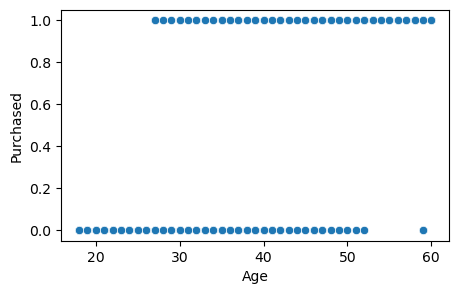

In [4]:
plt.figure(figsize = (5,3))
sns.scatterplot(x = 'Age', y = 'Purchased', data = newdf)
plt.show()

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
from sklearn.linear_model import LogisticRegression,Ridge

In [7]:
x = newdf[['Age']]
y = newdf[['Purchased']]

In [8]:
x_train,x_test , y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [9]:
obj = LogisticRegression()

In [10]:
obj.fit(x_train,y_train)

C:\Users\siddh\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [11]:
obj.score(x_test,y_test)

0.9125

In [12]:
obj.predict([[46]])

C:\Users\siddh\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

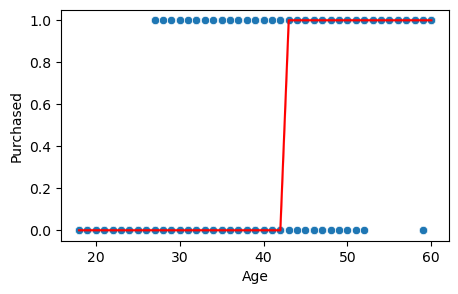

In [13]:
plt.figure(figsize = (5,3))
sns.scatterplot(x = 'Age', y = 'Purchased', data = newdf)
sns.lineplot(x = 'Age', y = obj.predict(x),data = newdf,color = 'r')
plt.show()

# Multiple inputs

In [15]:
datanew = pd.read_csv('placement.csv')

In [16]:
datanew.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [17]:
datanew.drop('Unnamed: 0',axis = 1,inplace = True)

In [18]:
data

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


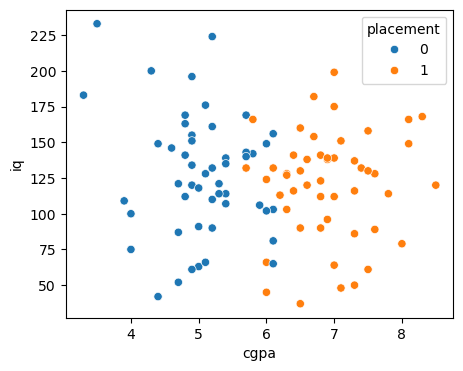

In [19]:
plt.figure(figsize = (5,4))

sns.scatterplot(x = 'cgpa', y = 'iq', data = datanew,hue= 'placement')


plt.show()

In [20]:
x1 = datanew.iloc[:,:2]
y1 = datanew[['placement']]

In [21]:
x_train,x_test,y_train,y_test = train_test_split(x1,y1)

In [22]:
obj2 = LogisticRegression()

In [23]:
obj2.fit(x_train,y_train)

C:\Users\siddh\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [24]:
obj2.score(x_test,y_test)

0.96

In [25]:
obj2.predict([[0	,123.0]])

C:\Users\siddh\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

In [26]:
from mlxtend.plotting import plot_decision_regions

In [27]:
x1.shape,y1.shape

((100, 2), (100, 1))

C:\Users\siddh\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


<Axes: >

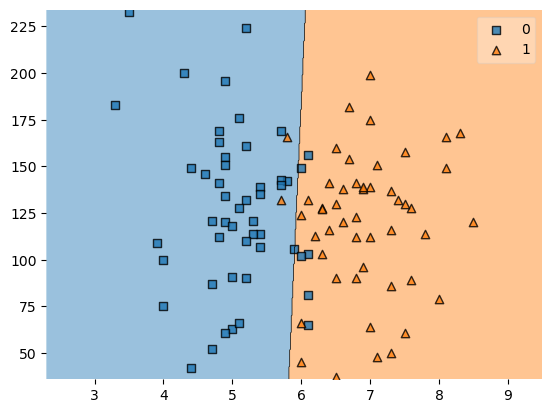

In [28]:
plot_decision_regions(x1.to_numpy(),y1.to_numpy().ravel(),clf=obj2)

In [29]:
from sklearn.preprocessing import PolynomialFeatures

In [30]:
x_train,x_test,y_train,y_test = train_test_split(x1,y1,test_size=0.2,random_state=42)

In [31]:
obj3 = LogisticRegression()

In [32]:
obj3.fit(x_train,y_train)

C:\Users\siddh\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [33]:
obj3.score(x_test,y_test)

0.85

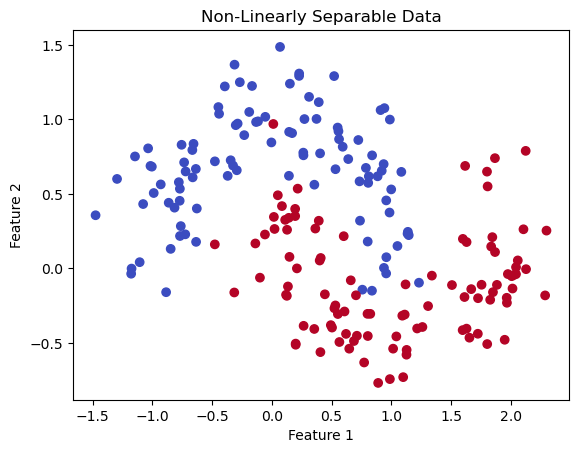

In [34]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
import numpy as np

# Generate a dataset with two interleaving half circles (not linearly separable)
X, y = make_moons(n_samples=200, noise=0.2, random_state=42)

# Visualizing the dataset
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Non-Linearly Separable Data")
plt.show()


In [35]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=3)  # Degree 3 for better non-linearity
X_poly = poly.fit_transform(X)


In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

# Create a pipeline: Polynomial Transformation + Logistic Regression
model = make_pipeline(PolynomialFeatures(degree=3), LogisticRegression())

# Train the model
model.fit(X, y)


Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=3)),
                ('logisticregression', LogisticRegression())])

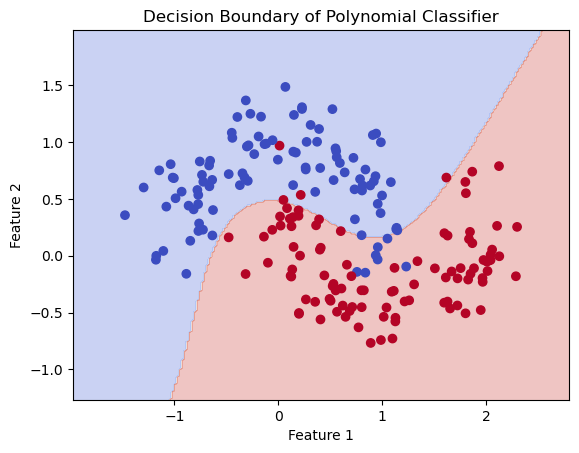

In [37]:
import numpy as np

def plot_decision_boundary(model, X, y):
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                         np.linspace(y_min, y_max, 200))
    
    # Predict class labels
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # Plot contour and scatter plot
    plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm')
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.title("Decision Boundary of Polynomial Classifier")
    plt.show()

plot_decision_boundary(model, X, y)


In [76]:
obj

LogisticRegression()

In [78]:
import pickle

In [80]:
with open('Model_pickel','wb') as f:
    pickle.dump(obj,f)

In [83]:
with open('Model_pickel','rb') as f:
    mp = pickle.load(f)

In [87]:
mp.predict([[46]])

C:\Users\siddh\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1], dtype=int64)